In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from bilansC import *

In [2]:
wd = '/Users/aalarcon/Documents/Jupyter/3_Isopropanol/'
#wd_figs = '/Users/aalarcon/Documents/Présentations/4_Modélisation_Ferm_515/figures/'

In [3]:
data_ferm = pd.read_excel(wd+'input/data/Fermentation_1242.xlsx', sheetname=None)
scen = ['PKT_Lactis_MM', 'Goret_MM', 'PKT_MM', 'PKT_Lactis_ZYM', 'Goret_ZYM', 'PKT_ZYM']

### Correct biomass data

With linear correction, if I want to interpolate a point $(t_x, v_x)$ between $(t_1, v_1)$ and $(t_2, v_2)$:

$v_x = \dfrac{t_x-t_1}{t_2-t_1} \cdot(v_2-v_1) + v_1$

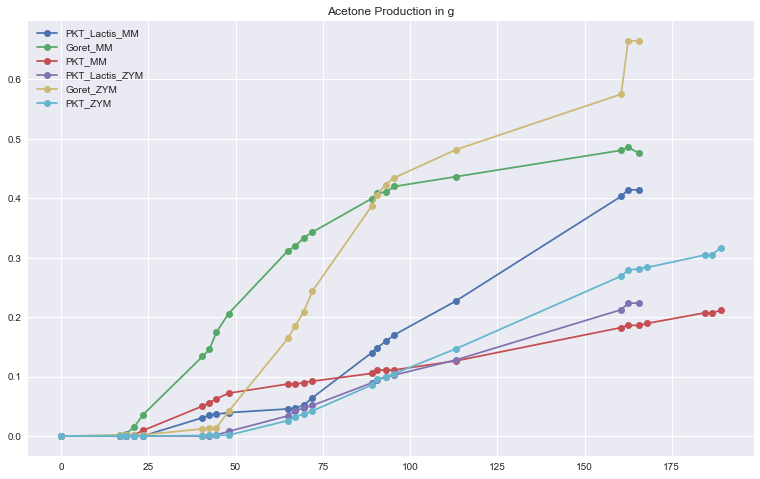

In [4]:
# Plot biomass in order to identify the beginning of production phase
fig = plt.figure(figsize=(13,8))
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['acetone_prod'], 'o-', label=s)
#plt.axvline(x=160.5, c='gray', ls='--', lw=2)
plt.legend()
plt.title('Acetone Production in g')
#fig.savefig(wd+'output/figs/biomass_production_after_treatment.png')

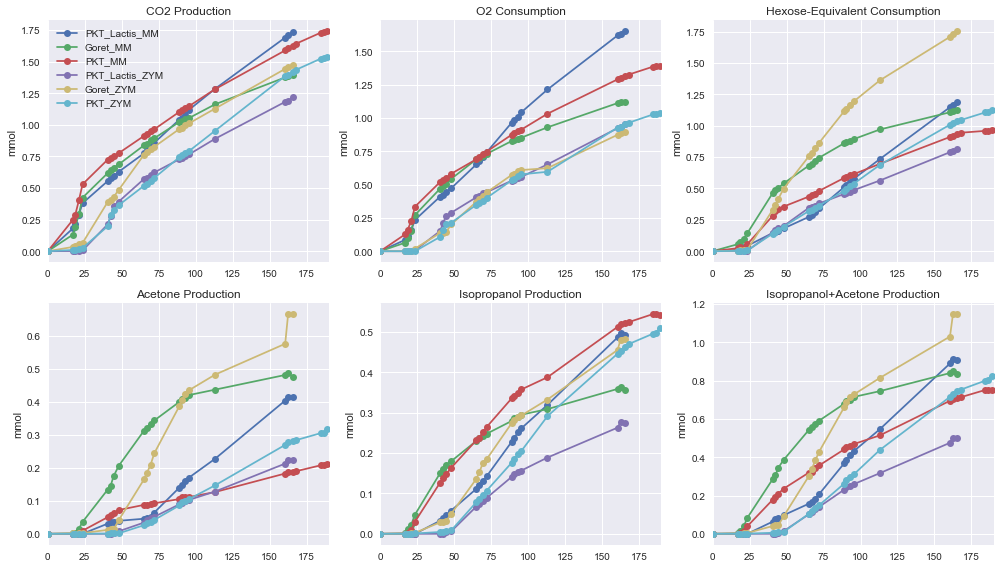

In [5]:
deb_prod = 0
fin_prod = 190
fig = plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['co2_prod'], 'o-', label=s)
plt.legend()
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('CO2 Production')

plt.subplot(2,3,2)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['o2_prod'], 'o-', label=s)
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('O2 Consumption')

plt.subplot(2,3,3)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['glc_prod'], 'o-', label=s)
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('Hexose-Equivalent Consumption')

plt.subplot(2,3,4)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['acetone_prod'], 'o-', label=s)
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('Acetone Production')

plt.subplot(2,3,5)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['iprop_prod'], 'o-', label=s)
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('Isopropanol Production')

plt.subplot(2,3,6)
for s,i in zip(scen, range(len(scen))):
    plt.plot(data_ferm[s]['t'], data_ferm[s]['acetone_prod']+data_ferm[s]['iprop_prod'], 'o-', label=s)
plt.xlim([deb_prod,fin_prod])
plt.ylabel('mmol')
plt.title('Isopropanol+Acetone Production')

plt.tight_layout()
#fig.savefig(wd_figs+'mets_prod_phase.png')

In [6]:
def phase_1242(t, s):
    deb_prod = {'PKT_Lactis_MM':40, 'Goret_MM':22, 'PKT_MM':22, 
              'PKT_Lactis_ZYM':48, 'Goret_ZYM':22, 'PKT_ZYM':65}
    fin_prod = {'PKT_Lactis_MM':160.5, 'Goret_MM':160.5, 'PKT_MM':168, 
              'PKT_Lactis_ZYM':160.5, 'Goret_ZYM':160.5, 'PKT_ZYM':184.5}
    if t<deb_prod[s]:
        return 'croiss'
    elif t<=fin_prod[s]:
        return 'prod'
    else:
        return 'fin'

In [7]:
#Add phase
for s in scen:
    data_ferm[s]['phase'] = data_ferm[s]['t'].apply(phase_1242, s=s)

In [8]:
mets = 'glc bm iprop ac acetone o2 co2'.split()

#Add glucose consumption in grams
glc_wght = 0.18 # g/mmol
for s in scen:
    data_ferm[s]['glc_g_flux'] = glc_wght*data_ferm[s]['glc_flux']

In [9]:
def boxplot_metabolite(met_plot, df_in, scen, title_plot='', suffix='_sp', ylabel='mmol/gDW/h'):
    df_plot_met = pd.DataFrame()
    for s in scen:
        if not(s=='WTnoglc' and met_plot=='glc'):
            df_plot_met[s] = df_in[s][df_in[s]['phase']=='prod'][met_plot+suffix]

    fig = plt.figure(figsize=(9,6))
    sns.boxplot(data=df_plot_met, whis=1)
    plt.title(title_plot)
    plt.ylabel(ylabel)
    return fig

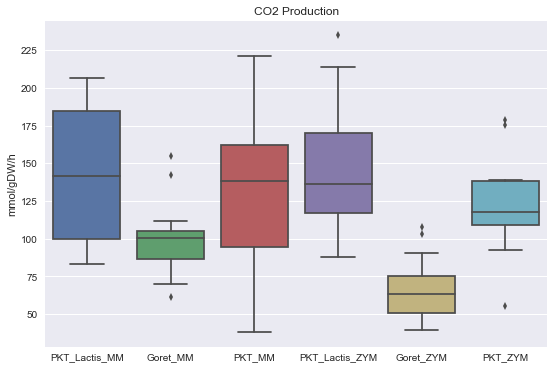

In [10]:
fig = boxplot_metabolite('co2', data_ferm, scen, title_plot='CO2 Production')
#fig.savefig(wd_figs+'boxplot_co2_prod')

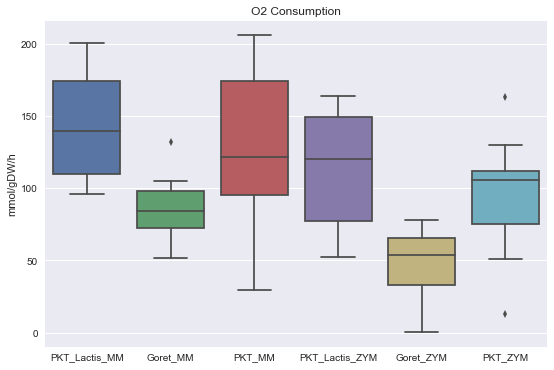

In [11]:
fig = boxplot_metabolite('o2', data_ferm, scen, title_plot='O2 Consumption')
#fig.savefig(wd_figs+'boxplot_o2_prod')

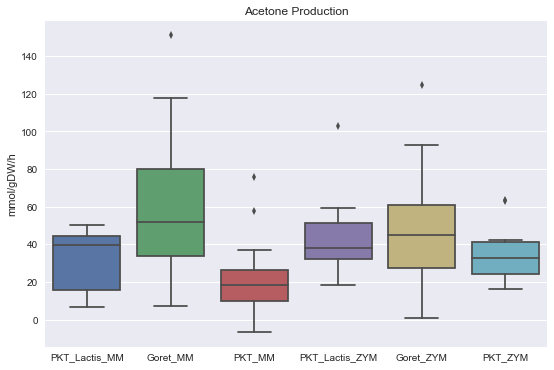

In [12]:
fig = boxplot_metabolite('acetone', data_ferm, scen, title_plot='Acetone Production')
#fig.savefig(wd_figs+'boxplot_acetone_prod')

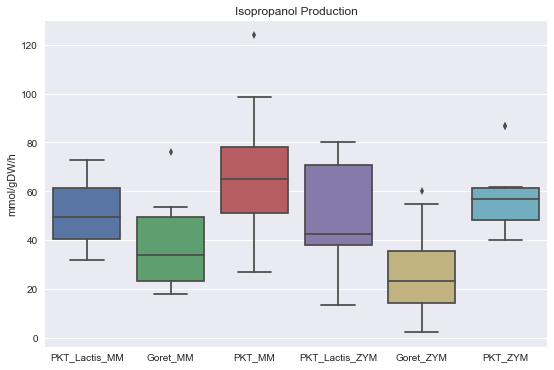

In [13]:
fig = boxplot_metabolite('iprop', data_ferm, scen, title_plot='Isopropanol Production')

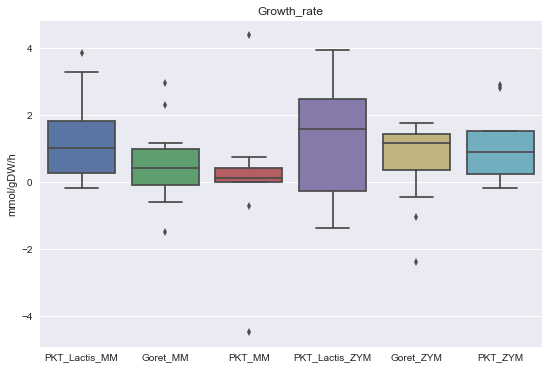

In [14]:
fig = boxplot_metabolite('bm', data_ferm, scen, title_plot='Growth_rate')
#fig.savefig(wd_figs+'boxplot_gr_prod.png')

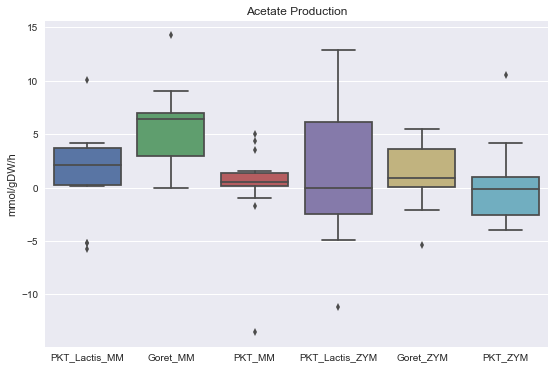

In [15]:
fig = boxplot_metabolite('ac', data_ferm, scen, title_plot='Acetate Production', ylabel='mmol/gDW/h')
#fig.savefig(wd_figs+'boxplot_glc_prod.png')

#### Pour chacun des données je prends le minimum (25%) et maximum (75%)

WTg ne sera pas prise en compte. Problème avec production d'acetone en PKT et PKTg.

In [16]:
#scen.remove('WTg')
data_ferm_out = dict()
for s in data_ferm:
    data_ferm_out[s] = data_ferm[s][data_ferm[s]['phase']=='prod']

In [17]:
data_out = recap_ferm_data(data_ferm_out, mets, scen=scen)

In [18]:
data_out.to_excel(wd+'input/ferm515_modele.xlsx')

### Bilan Carbone Fermentation

In [19]:
data_bilanC = data_out.xs('med', level=1)
data_bilanC.to_excel(wd + 'output/recap_ferm_data.xlsx')
data_bilanC

,PKT_Lactis_MM,Goret_MM,PKT_MM,PKT_Lactis_ZYM,Goret_ZYM,PKT_ZYM
mets,,,,,,
glc,-100,-100,-100,-100,-100,-100
bm,1.02261,0.51567,0.132072,1.57819,1.19346,0.907519
iprop,49.7149,35.478,62.0805,42.632,23.5917,57.0035
ac,2.13204,6.25226,0.516851,0,1.30039,0.608365
acetone,39.4445,48.9199,19.0091,38.2588,42.0339,31.1386
o2,-140.021,-84.4457,-121.651,-120.349,-55.2747,-104.189
co2,141.886,101.521,139.693,136.283,69.8431,125.874


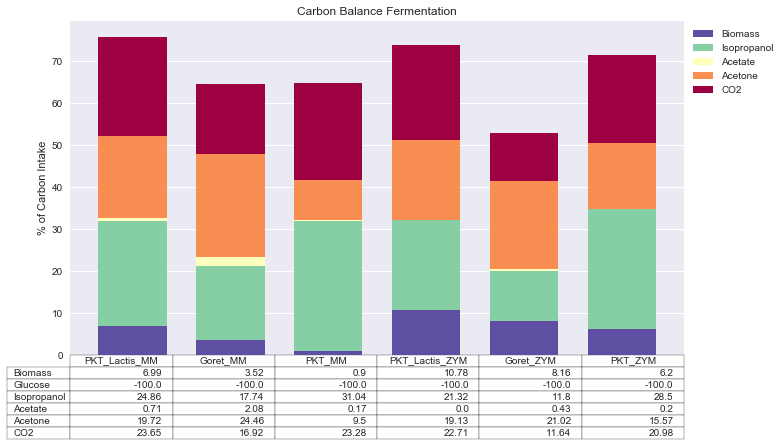

In [22]:
fig = bilanC(data_ferm=data_bilanC)
fig.savefig('/Users/aalarcon/Documents/Présentations/6_Réunion_dept/figures/bilanC_exp_1242.png')